In [1]:
!pip install mplfinance
!pip install finance-datareader

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.0/75.0 kB 1.8 MB/s eta 0:00:00


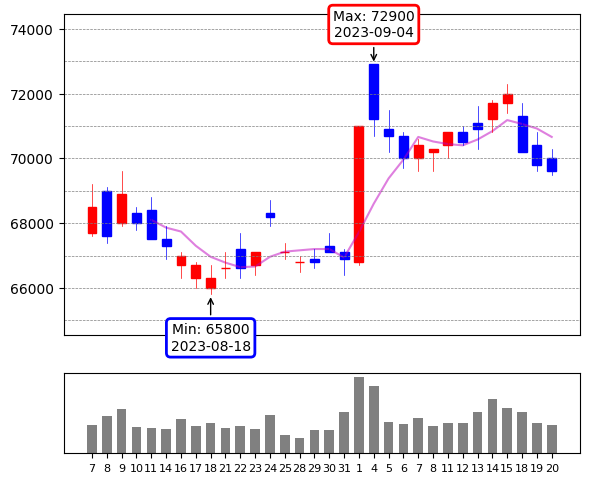

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from mplfinance.original_flavor import candlestick_ohlc
import FinanceDataReader as fdr

# 삼성전자 종목코드: '005930'
code = '005930'
startdate = '2023-08-07'
enddate = '2023-09-20'

fig = plt.figure(figsize=(6, 5))
fig.set_facecolor('w')
gs = gridspec.GridSpec(2, 1, height_ratios=[4, 1])
axes = []
axes.append(plt.subplot(gs[0]))
axes.append(plt.subplot(gs[1], sharex=axes[0]))
axes[0].get_xaxis().set_visible(False)


data = fdr.DataReader(code)
data_ = data[startdate:enddate]

x = np.arange(len(data_.index))
ohlc = data_[['Open', 'High', 'Low', 'Close']].values
dohlc = np.hstack((np.reshape(x, (-1, 1)), ohlc))

ma5 = data_['Close'].rolling(window=5).mean()
axes[0].plot(x, ma5.values,color='m', alpha=0.5)

# 봉차트 그리기
candlestick_ohlc(axes[0], dohlc, width=0.6, colorup='r', colordown='b')

# 거래량 차트 그리기
axes[1].bar(x, data_['Volume'], color='grey', width=0.65, align='center')
axes[1].set_xticks(range(len(x)))
axes[1].set_xticklabels(list(map(int, data_.index.strftime('%d'))), fontsize=8)
axes[1].get_yaxis().set_visible(False)

# 최저가 및 최고가 표시하기
min_idx=data_['Low'].idxmin()
max_idx=data_['High'].idxmax()

min_val=data_.loc[min_idx]['Low']
max_val=data_.loc[max_idx]['High']

min_date=min_idx.strftime('%Y-%m-%d')
max_date=max_idx.strftime('%Y-%m-%d')

up_bbox_props=dict(boxstyle="round,pad=0.3", fc="white", ec="red", lw=2)
down_bbox_props=dict(boxstyle="round,pad=0.3", fc="white", ec="blue", lw=2)
arrowprops=dict(arrowstyle="->")

xmin=x[data_.index.get_loc(min_idx)]
xmax=x[data_.index.get_loc(max_idx)]

# xytext values adjusted to move the annotation box around.
axes[0].annotate(f'Min: {int(min_val)}\n{min_date}', (xmin, min_val),textcoords="offset points", xytext=(0,-40), ha='center', bbox=down_bbox_props, arrowprops=arrowprops)
axes[0].annotate(f'Max: {int(max_val)}\n{max_date}', (xmax, max_val), textcoords="offset points", xytext=(0,20), ha='center', bbox=up_bbox_props, arrowprops=arrowprops)

# Get the positions of the yticks
yticks = axes[0].get_yticks()
# Draw a horizontal line at each ytick
for y in yticks:
    axes[0].axhline(y, color='gray', linestyle='dashed', linewidth=0.5)

plt.tight_layout()
plt.show()

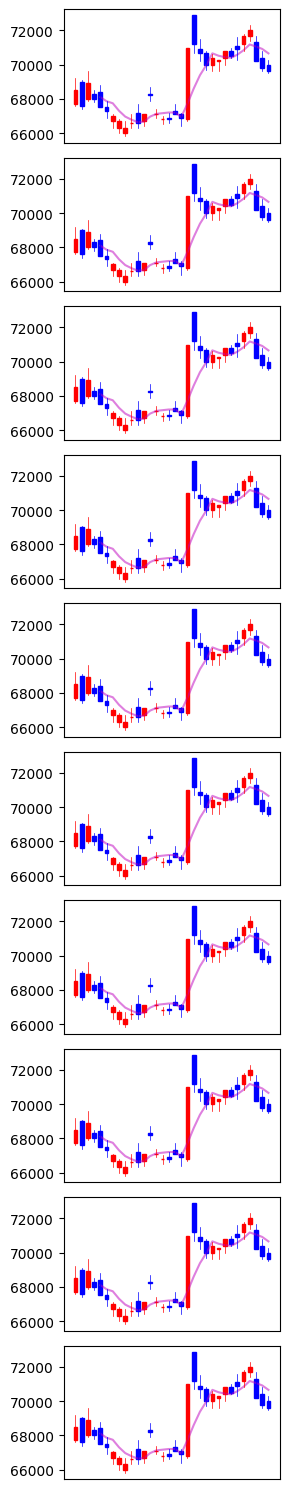

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from mplfinance.original_flavor import candlestick_ohlc
import FinanceDataReader as fdr

# 삼성전자 종목코드: '005930'
code = '005930'
startdate = '2023-08-07'
enddate = '2023-09-20'

data = fdr.DataReader(code)
data_ = data[startdate:enddate]

x = np.arange(len(data_.index))
ohlc = data_[['Open', 'High', 'Low', 'Close']].values
dohlc = np.hstack((np.reshape(x, (-1, 1)), ohlc))

ma5_values = data_['Close'].rolling(window=5).mean().values

fig, axes = plt.subplots(nrows=10, ncols=1, figsize=(3, 15), sharex=True)
fig.set_facecolor('w')

for ax in axes:
    ax.plot(x, ma5_values,color='m', alpha=0.5)

    # 봉차트 그리기
    candlestick_ohlc(ax, dohlc, width=0.6, colorup='r', colordown='b')

    # x축 티커 없애기
    ax.get_xaxis().set_visible(False)

plt.tight_layout()
plt.show()
